**Содержание темы**

1. Теория
2. [Практический ноутбук 1](https://colab.research.google.com/drive/1HnNwTTLKHH32p3EnqYlKZSy9SctXDvp8?usp=sharing)
3. [Практический ноутбук 2](https://colab.research.google.com/drive/1ncu24LsUYgVKY4OgJyJJjogeuR3eF7ok?usp=sharing)


Урок посвящен введению в обучение с подкреплением и Q-обучение. 

## Подходы к обучению НС

1. Обучение с учителем — классическая форма обучения НС, при которой база данных уже собрана и размечена. Для каждого примера есть правильный ответ.
2. Обучение без учителя при собранной базе, но без правильных ответов. Чаще всего это задачи кластеризации, когда НС вычленяет какой-то признак, на основе которого можно разбить всю базу на группы.
3. Обучение с подкреплением — это обучение НС похоже на маленького ребенка, который не научился ходить, но уже пробует. Он видит, как ходят взрослые и за счет проб и ошибок учится ходить. Привычной базы для обучения нет, но есть инструменты для решения данной задачи.

###Обучение с подкреплением: особенности

У обучения с подкреплением есть свои особенности:
* не нужно собирать базу данных, но данные для обучения все равно нужны;
* данные можно создавать прямо во время обучения;
* нейронная сеть учится на своих ошибках и победах;
* процесс достаточно долгий, и нужно набраться терпения.

НС пробует различные варианты, экспериментирует, изучает среду и получает обратную связь, правильно она что-то делает или нет.

## Сферы применения

Существуют различные задачи, в которых обучение с подкреплением — чуть ли не единственный инструмент:
* научить робота ходить. На курсе мы уже проходили, как научить робота ходить при помощи алгоритмов, перебирая значения. Обучение с подкреплением универсальнее и научит робота не только ходить, но и перепрыгивать через препятствия и не поскальзываться на льду.
* автопилот для автомобиля — это синтез различных НС. Компьютерное зрение позволяет машине увидеть обстановку на дороге, а обучение с подкреплением — учит не врезаться.
* играть в игры. Возможность победить в игру Go появилась только с появлением НС. Сложность была в том, что в этой игре слишком много комбинаций, и ни один алгоритм не мог просчитать их все. Не говоря уже о технических мощностях, которые требуются для решения задачи.
* составление расписаний. Сложно собрать базу лучших расписаний для смен работников, наверное даже невозможно. Но возможно обучить НС следовать определенным указаниям и составлять идеальное расписание.
* трейдинг — на курсе мы проходили решение этой задачи при помощи временных рядов, но сложность заключается не в предсказании стоимости на завтра, а в определении того, входить в рынок или нет.

Практически на всех этих задачах сложно или непрактично собирать базу для обучения.

## Основные определения

1. **Агент** и **НС**, которая его контролирует — ребенок из предыдущего примера и его мозг.
2. **Среда** — комната, в которой находится ребенок.
3. **Состояние** — это текущее положение среды. Представим, что если ребенка снимали на видео, то каждый кадр — это состояние среды. Оно может меняться из-за действия агента, например ребенок передвинул игрушки. **Важно: НС не контролирует среду.** Мозг ребенка не может превратить домашнюю комнату в помещение завода.
4. **Значение состояния** — максимальная известная величина награды за все возможные действия в текущем состоянии. Ребенок пошел — награда плюс 10 очков, не пошел — ничего, упал — минус 5 очков. В таком случае значение равно +10. 

Теперь, когда сформировался единый понятийный аппарат, перейдем к тому, как правильно поставить задачу при обучении.

## Принцип обучения НС

Как же НС обучится без базы и правильных ответов? Для примера возьмем маленького ребенка, который учится ходить. Когда у него что-то не получается, он падает, ударяется, ему неприятно, и он понимает, что делает что-то не так. Но, когда у него получается сделать первый шаг, он слышит ободряющие слова родителей и видит их радостные лица. В этом примере боль — наказание, радостные лица — награда. А в дальнейшем золотая медаль по бегу — награда, отказ в допуске к соревнованиям — наказание.

Также происходит обучение НС. Вначале НС делает все случайным образом и получает награды/наказания за свои действия. Затем логика выстраивается, и НС понимает, что от нее хотят и старается получать больше наград и меньше наказаний.

Награды и наказания — всегда скалярные значения со знаком плюс или минус соответственно. 

Задача состоит в том, чтобы агент получил максимально возможную или приближенную к этому награду в долгосрочной перспективе. Если ребенок научится ходить назад, то фактически он научился ходить, но бегать он практически не сможет. Поэтому важна не кратковременная награда здесь и сейчас, а работа на долгосрочную перспективу.

Чтобы агент выиграл, он должен выполнить правильную цепочку действий, но возможно, что она не единственная. Например, в шашках можно выиграть с минимальной потерей шашек, а можно выиграть последней шашкой. Поэтому система наград и наказаний должна быть правильно выстроена. Если в шашках неважно, сколько агент потеряет шашек, а важна только победа — выставляем награды за победу и срубленные шашки. Если все-таки потери важны — добавляем наказания за потерю своих шашек.

Теперь, когда мы определились с основными понятиями и способами работы, перейдем к вариантам реализации алгоритма на практике.

### Основные алгоритмы

**Основные алгоритмы**, которые рассмотрены на уроках: Q-learning в этом уроке, PG и, в частности, REINFORCE в следующем уроке, A2С в третьем уроке.

Также существует множество других алгоритмов, которые можно изучить самостоятельно:
* Proximal Policy Optimizer (PPO);
* Deep Deterministic Policy Gradients (DDPG);
* Soft Actor-Critic (SAC);
* Twin-Delayed Deep Deterministic Policy Gradient (TD3);
* Trust-Region Policy Optimization (TRPO);
* Asynchronous Advantage Actor-Critic (A3C);
* и многие другие.


Основная особенность — это долгое время обучения, так как 90% времени занимает генерация данных. Из этого же и следует, что в Colab можно использовать CPU вместо GPU. Ускорения на GPU можно добиться, но только на промышленном уровне, используя определенные технологии. Почти всегда используют простые НС без слоев Dropout и BatchNormalization, так как они не приносят никакой пользы.

Теперь немного углубимся в математику, чтобы понять основы того, как работает алгоритм.

### Математический принцип работы алгоритма

В основе алгоритма лежит уравнение Беллмана:

> `Q(s, a) = r(s, a)  + ɣ * max(Q(s’, a’))`, где:

* `a` — действие агента;
* `s` — текущее состояние среды;
* `s’` — следующее состояние среды;
* `a’` — следующее действие при следующем состоянии;
* `r(s,a)` — моментальное вознаграждение за действие в данном состоянии среды;
* `Q(s,a)` — Q-значения/дисконтированные вознаграждения, которая считает взвешанную сумму возножных будующих вознаграждений по формуле ниже (по текущему состоянию и действию);
* `y` — гиперпараметр, который определяет важность текущей награды или награды в будущем. Указывается в диапазоне от 0 до 1. Чем меньше, тем больше акцент смещается к важности текущей награды;
* `Q(s',a')` — Q-значения/дисконтированные вознаграждения, которая считает взвешанную сумму возножных будующих вознаграждений по формуле ниже (по следующему состоянию и действию)

Функция рекурсивна, частный пример выглядит так:

> `Q(s, a) = r(s, a)  + ɣ * max(r(s’, a’)) + ɣ^2 * max(r(s’’, a’’))  + ɣ^3 * max(r(s’’’, a’’’))`...


Еще уравнение Беллмана можно записать через `V(s)`:

>`V(s) = max(r(s, a)  + ɣ * V(s’))`, где:

`V(s)` — значение текущего состояния: насколько оно хорошее.

Упрощенная форма `V(s) = max(Q(s,a))`. Представим, что в текущем состоянии есть два варианта действий: пойти направо и пойти налево. За первый дают 5 очков, а за второй — 10. `V(s)` равно 10.

Как можно видеть, данные алгоритмы не имеют ячеек памяти и работают только с текущим состоянием среды. И этого достаточно практически для любых целей.

На этом математика заканчивается, и мы можем рассмотреть очень важную дилемму обучения с подкреплением.

## Дилемма: разведка против эксплуатации 

Она состоит в том, что есть:
* эксплуатация — алгоритм просто указывает, что делать агенту по одному и тому же сценарию;
* разведка — алгоритм заставляет агента каждый раз пробовать что-то новое, чтобы понять, какие результаты это может принести.

Каждый алгоритм достигает этого по-своему. В Q-обучении существует параметр `epsilon`, который указывает, как часто используется рандомное действие для исследования среды. Но со временем обучения `epsilon` понижается с условием `epsilon > 0`, так как при 0 обучения не происходит.

Бывают случаи, когда после обучения можно приравнять `epsilon` к 0 для использования алгоритма.

Информацию о полученных наградах за разведку необходимо где-то хранить, и для этого есть Q-таблицы.

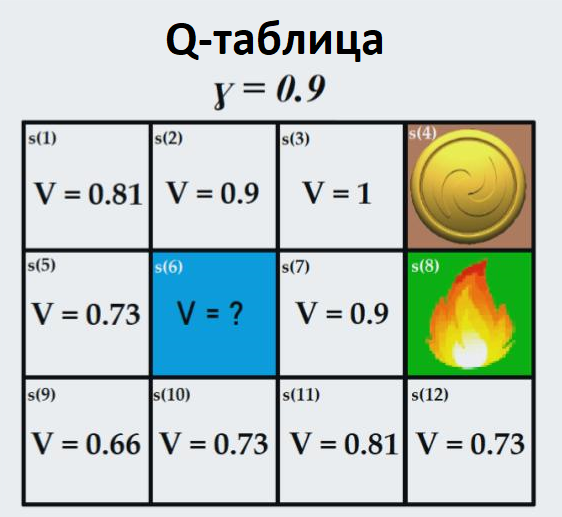

**Q-таблица** — это хранилище состояний среды и максимальных наград, которые можно в ней получить. Изначально эта таблица хранит в себе только нули, так как алгоритм не знает о возможных наградах. При исследовании таблица начинает заполняться информацией о наградах. 

>Для примера на слайде изображен мини-лабиринт, в котором нужно найти монетку и не попасть в огонь. 

Представим, что стартуем с синей клетки. Можете пока подумать, чему будет равен `V` в данной клетке, ответ представлен ниже. Если агент сдвинется влево или вниз, то отдалится от монетки. Вправо или вверх, то приблизится к ней. 

Теперь рассмотрим верхнюю клетку с `V=1`. Если сдвинемся вправо, достигнем монетки и получим 1 балл, т.е. максимально возможную награду.

Когда исследование окончится, и таблица заполнится, агент станет двигаться для сбора максимальной награды. Такой метод называется `Epsilon greedy`. Epsilon — разведка, greedy — получение максимальной выгоды.

В синей клетке `V=0.81`. Если посмотреть на картинку, то она находится в трех шагах от монетки. На таком же расстоянии находятся клетки с `V=0.81`.

Представим себе ситуацию, когда вариантов состояний слишком много, чтобы хранить в их таблицах, что тогда?

В таком случае используем НС, которая предсказывает значение `Q(s,a)`. Эта НС принимает на вход текущее состояние среды и на выходе выдает нужные значения. На словах это звучит хорошо, а что насчет практики?

## Воспроизведение памяти

Представим, что алгоритм должен научить машинку ездить по трассе. Для этого есть  два пакета данных: первый, где алгоритм учится ехать прямо, второй — поворачивать. Сложность в том, что после того, как НС научится ездить прямо, она получит второй пакет данных и начнет учиться поворачивать, забывая то, что выучила до этого.

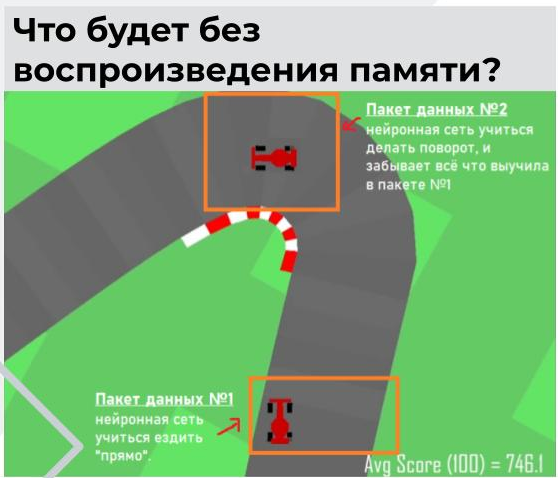

Есть разные инструменты для решения этой проблемы. Выделим два из них:

1. Первый инструмент — механизм воспроизведения памяти, `memory replay`. В алгоритм добавляется буфер памяти, в котором хранится большое количество состояний среды, действий и наград за них. В этом буфере хранятся и прямые участки трассы, и места, где необходимо поворачивать. НС в случайном порядке получает эти состояния, чтобы избежать переобучения. Данные в этом буфере обновляются в соответствии с результатами обучения НС.

2. Второй инструмент — добавление целевой НС. В классическом варианте текущее и будущее состояния среды предсказывает одна НС. Это может привести к тому, что НС совершит большую ошибку и не решит поставленную задачу. Для этого разделим задачу: основная сеть предсказывает только текущее состояние, а целевая сеть, полная копия основной, предсказывает следующее состояние. В этом случае обучается только одна НС — основная. Целевая же нечасто копирует из основной веса, например раз в две тысячи шагов.

С теорией разобрались. Для практики же совершенно необязательно писать игру. Вместо этого рассмотрим два основных фреймворка для тренировки навыков.

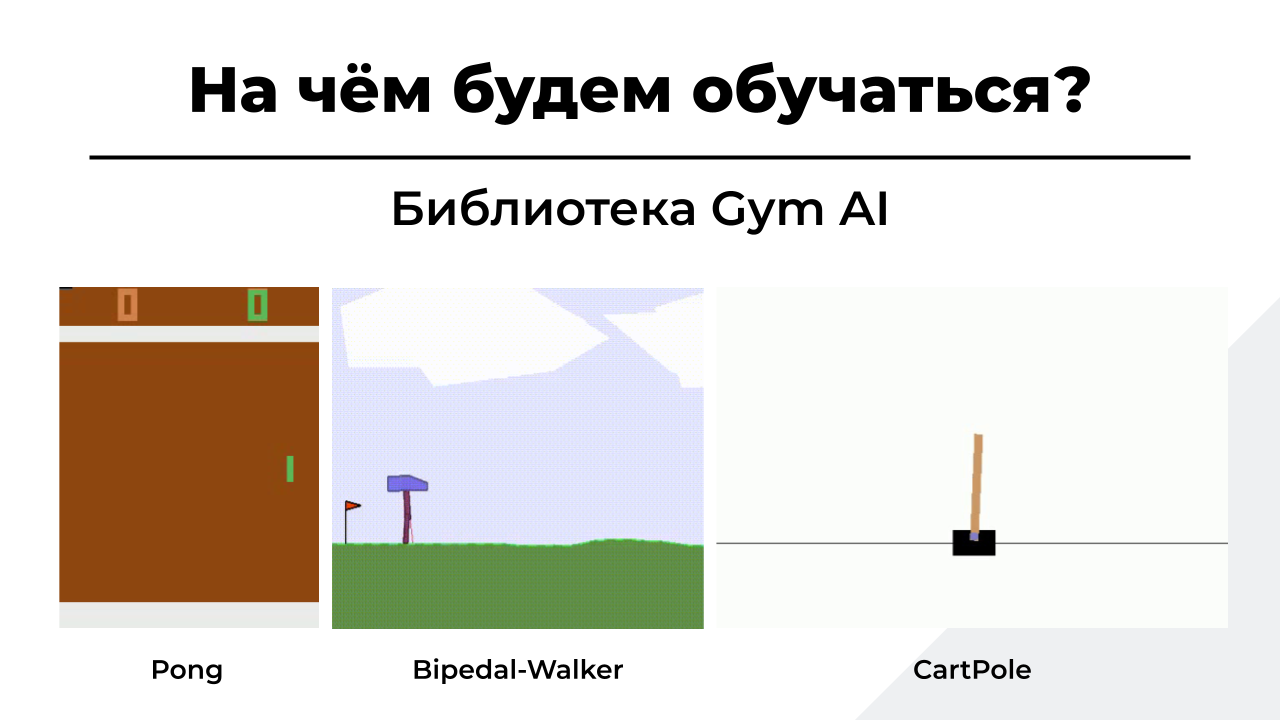

Этот фреймворк — самый популярный, который подходит для множества игр. От простых (пинг-понг) до игр средней сложности, например обучения двуногого робота хождению. Основные минусы — медленное выполнение кода, необходимость искать нестандартные решения, если нужно назначить свои награды.

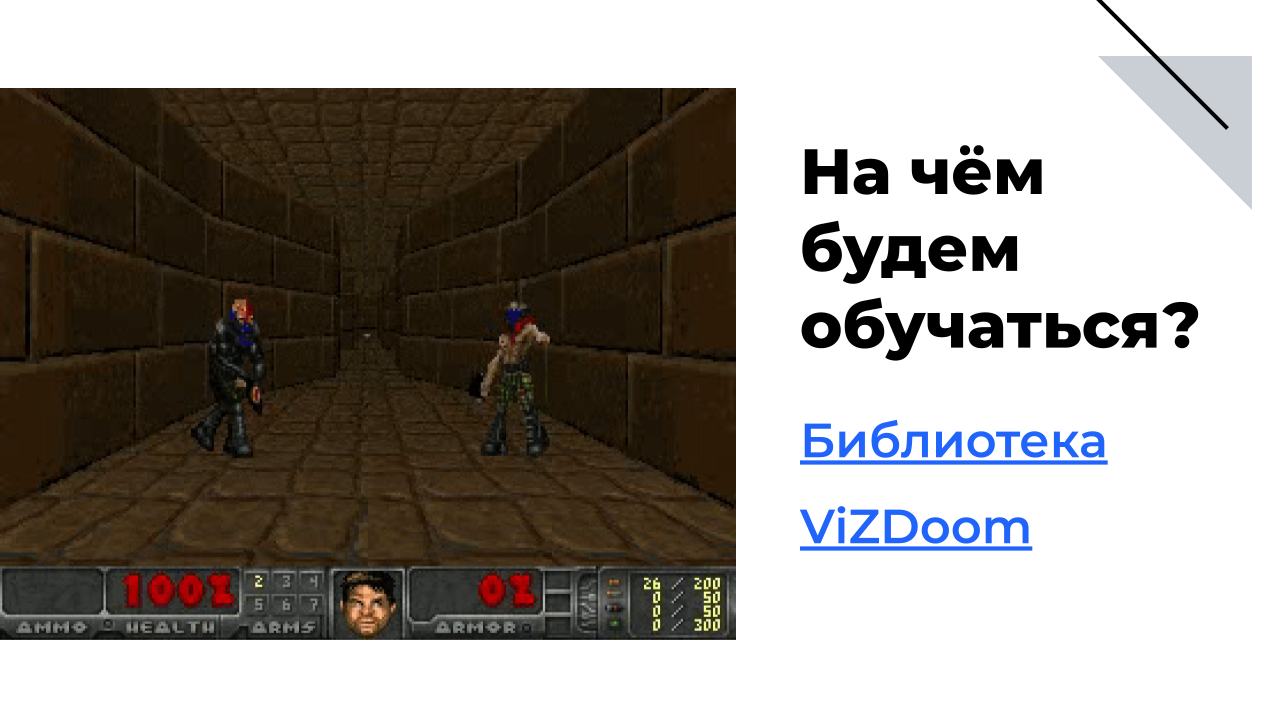

Скачать ViZDoom: [ссылка](https://storage.yandexcloud.net/aiueducation/Content/advanced/l6/rl.zip)

Этот фреймворк менее популярен, но это не значит, что он хуже. Это копия популярной игры Doom. 

Основные плюсы — код выполняется очень быстро, можно назначать свои награды, есть множество разных сценариев, с которыми можно взаимодействовать большим количеством алгоритмов. 

Минусы — иногда требуется работать с файлами.

**Содержание темы**

1. Теория
2. [Практический ноутбук 1](https://colab.research.google.com/drive/1HnNwTTLKHH32p3EnqYlKZSy9SctXDvp8?usp=sharing)
3. [Практический ноутбук 2](https://colab.research.google.com/drive/1ncu24LsUYgVKY4OgJyJJjogeuR3eF7ok?usp=sharing)
